# Project 1 - Standardized Testing, Statistical Summaries and Inference with SAT & ACT Scores from 2017

_Author: Schubert Hervery Laforest (BOS)_

![](https://myteacherstogo.files.wordpress.com/2016/05/sat-act-banner.jpg?w=768)

## Overview 

The following project is a cursory look at the SAT and ACT scores in the United States for the year 2017. The data is tabulated by the College Board and serves to give a snapshot of how test takers from different states perform and at what rate to they participate in taking these standardized tests. The goal of this project is to explore the performance and participation data of these two exams across states, in order to get better understanding of overall trends. This notebook is geared towards a more technical audience, so a basic understanding of Python, Pandas, inferential statistics and associated visualizations is assumed. The insigts generated in this notebook  will be used to inform a presentation to the US College Board in order to make suggestions as to how they can improve participation in both exams accross states. 

## Notebook Guide

- [EDA and Pre-Processing the Datasets](#prepro)
- [Cleaning the Data](#cleaning)
- [Manipulating the Data](#manipulating)
- [Descriptive Statistics & Visualizing the Data](#viz)
- [Inferential Statistics & Conclusion](#stats)

<a id='prepro'></a>
## EDA & Pre-Processing the Datasets 

Now that we have a better understanding of the provenance of the data and the larger context, lets load the data. Since this is the main data this project is centered around, we need to get a sense of how its structured, conduct a few integrity checks, identify where cleaning needs to take place and do so, all before diving into analysis. 

In [1]:
# Loading in the SAT & ACT data using Pandas, as well as all packadges necesary for the project 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

os.chdir('/home/schubert/DSI/week_2/project-1/data')

act = pd.read_csv("./act.csv")
sat = pd.read_csv("./sat.csv")

As we can see, we're going to be working with two csv files. We've loaded them into a Panda's dataframe so that we can better explote it and use the power of Python and stats to glean cool insights. Let's explore the data a bit.

### SAT Data  Overview 

In [2]:
# getting the info, description, shape, head of SAT dataframe 
print(sat.info())
display(sat.describe()) # Sumary Statistics
display(sat.head(10))
print('SAT Shape', sat.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB
None


,Unnamed: 0,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,25.000000,569.117647,547.627451,1126.098039
std,14.866069,45.666901,84.909119,92.494812
min,0.000000,482.000000,52.000000,950.000000
25%,12.500000,533.500000,522.000000,1055.500000
50%,25.000000,559.000000,548.000000,1107.000000
75%,37.500000,613.000000,599.000000,1212.000000
max,50.000000,644.000000,651.000000,1295.000000


,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


SAT Shape (51, 6)


** *SAT Columns Description* **

**Unnamed**:  This column is the index, unique key for each row for this data set

**State**: Represents the state from which the data of that row originates 

**Participation**: The rate of participation (sucessful completion of the exam) of High School Graduates (HS)

**Evidence-Based Reading and Writing**: Average (arithmetic mean) score of the HS graduates who took the test in that state

**Math**: Average (arithmetic mean) score of the Math exam section for the HS graduates who took the test in that state

**Total**: Average (arithmetic mean) of cumulative exam score of the the HS graduates who took the test in that state

### ACT Data Overview

In [3]:
# getting the info, description, shape, head of ACT dataframe 
print(act.info())
display(act.describe()) # Sumary Statistics
display(act.head(10))
print('ACT shape', act.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Unnamed: 0       52 non-null int64
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ KB
None


,Unnamed: 0,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,25.500000,20.919231,21.173077,22.001923,21.040385,21.509615
std,15.154757,2.332132,1.963602,2.048672,3.151113,2.002083
min,0.000000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,12.750000,19.000000,19.400000,20.475000,19.900000,19.800000
50%,25.500000,20.550000,20.900000,21.700000,21.150000,21.400000
75%,38.250000,23.300000,23.100000,24.125000,22.525000,23.600000
max,51.000000,25.500000,25.300000,26.000000,24.900000,25.500000


,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


ACT shape (52, 8)


** *ACT Columns Description* **

**Unnamed**:  This column is the index, unique key for each row for this data set

**State**: Represents the state from which the data of that row originates 

**Participation**: The rate of participation (sucessful completion of the exam) of High School Graduates (HS)

**English**: Average (arithmetic mean) score of the HS graduates who took the test in that state

**Math**: Average (arithmetic mean) score of the Math exam section for the HS graduates who took the test in that state

**Reading**: Average (arithmetic mean) score of the reading exam section for the HS graduates who took the test in that state

**Science**: Average (arithmetic mean) score of the Science exam section for the HS graduates who took the test in that state

**Composite**: Average (arithmetic mean) of cumulative exam score of the the HS graduates who took the test in that state

<a id='inte'></a>
### Data Integrity Check

Upon eyballing the two datasets, there are a few things to note. First of all, it seems that the the datapoints in the SAT and ACT datasets are aggregate statistics, and not the raw scores themselves. For example, each of the numeric columns seem to represent the arithmetic mean of all results of a given state for 2017. Furthermore, the Total (SAT) and Composite (ACT) columns represent means presumably calculated based on the aformentioned raw data. We know this because if we try to derive these scores based on the ACT and SAT datapoints we have, the result is slightly off.  Not having access to the raw data deprives us of a level of granularity and detail. Nevertheless, for the pupose of this project, these data sets will suffice. 

Secondly, the National average row is present in the ACT, and not in the SAT data. The way this national statistic appears to be calculated is based of raw ACT data/scores I do not have access to. The mathematically and scientifically reasonable thing to do would be to remove this row from our data set since we do not have access to the same statistics in the SAT data. That way, should we wish to calculate this statistic as we move further into analysis, we can do so based on the data we have access to, accross the ACT and SAT data sets, in a coherent and mathematically consistent manner.

In [4]:
# Dropping the Naional Average row from the ACT dataset
act = act.drop([0])

Third, it's important to point that that we are comparing two relatively different exams. Although they proport to test for the same competencies in tesktakers, the SAT and ACT are broken up into different sections and graded on a different scale. This is something to keep in mind as we move to the analysis portion.

Fourth, based on this data, we have no way of knowing what the percentage overlap, if any, between these two populatons is. In other words, we have no way of teasing out the amount of students who took both exams. 

Other than that, I feel comfortable moving forward with the data sets. There isn't any blatantly missing data and the cleaning necessary to get it into a workable state seems minimal.

<a id='cleaning'></a>
### 3. Cleaning the Data

Now that we've gotten a good sense of how our data sets are structured, it's time to clean it and get it in a that we can conduct comprehensive analysis on. 

**Getting the right data types**

In [5]:
# Looking at the data types of each column 
print('ACT Column Data Types')
for column in act.columns:
    print(type(column))

print('_____________________________')

print('SAT Column Data Types')
for column in sat.columns:
    print(type(column))

ACT Column Data Types
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
_____________________________
SAT Column Data Types
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


Since we want to be able to perform mathematical operations and statistical analysis on the numeric columns, we will cast them in the apporpriate data types.

In [6]:
# Casting SAT participation as float since it's a percentage. Even though these percentages seems to have been
# rounded already, mathematically, float is the appropriate data type for this kind of numeric value/calculation 

sat['Participation'] = (sat['Participation']).str.replace('%','').astype(float)

In [7]:
# Casting the rest of SAT numeric columns as int as scores can only be whole numbers
sat[['Unnamed: 0',
     'Evidence-Based Reading and Writing', 
     'Math', 'Total']] = sat[['Unnamed: 0','Evidence-Based Reading and Writing', 'Math', 'Total']].astype(int)

In [8]:
# Using the same data type casting logic with ACT columns 
act['Participation'] = act['Participation'].str.replace('%','').str.replace('%','').astype(float)
act[['English', 'Math',
     'Reading', 'Science',
     'Composite']] = act[['English', 'Math', 'Reading', 'Science',
                          'Composite']].astype(float) # decimal scores, preserving detail 

act['Unnamed: 0'] = act['Unnamed: 0'].astype(int) # casting as int because may want as index

** Creating Dictionaries and Merging the Data**

In this step, we will do our final preparations to merge the two datasets into one. We will be merging them on the State column. Normally we would want to join data on unique numeric id/key columns, and the Unnamed column was an early candidate for this manipulation. However, given our datasets, the State column is common to both, each being unique (and spelled correctly!). Since both the Unnamed and State columns are essentially similarly unique, we can do away with the Unnamed columns, and keep the State columns as it is pertinent to our analysis. Two frames, one column, Occam's Razor!   

In [9]:
# Dropping the Unnamed columns 
act.drop(['Unnamed: 0'], axis=1, inplace=True)
sat.drop(['Unnamed: 0'], axis=1, inplace=True)

Now, let's rename the columns in both datasets so that we can tell them appart once everything is merged

In [10]:
# Renaming the columns 
sat.rename(columns = {
    'Participation': 'SAT_Rate',
    'Evidence-Based Reading and Writing': 'SAT_ELA', # English Language Arts
    'Math': 'SAT_Math',
    'Total': 'SAT_Total'
}, inplace=True)

act.rename(columns = {
    'Participation': 'ACT_Rate',
    'English': 'ACT_English',
    'Math': 'ACT_Math',
    'Reading': 'ACT_Reading',
    'Science': 'ACT_Science',
    'Composite': 'ACT_Composite'
}, inplace=True)

Before merging, let's create some dictionaries and do some manipulations, for fun! 

In [11]:
# Creating a dictionary for each column in the SAT dataset
sat_rate = sat.set_index('State')['SAT_Rate'].to_dict()
sat_ela = sat.set_index('State')['SAT_ELA'].to_dict()
sat_math = sat.set_index('State')['SAT_Math'].to_dict()
sat_total = sat.set_index('State')['SAT_Total'].to_dict()

# Creating a dictionary for each column in ACT dataset
act_rate = act.set_index('State')['ACT_Rate'].to_dict()
act_english = act.set_index('State')['ACT_English'].to_dict()
act_math  = act.set_index('State')['ACT_Math'].to_dict()
act_reading = act.set_index('State')['ACT_Reading'].to_dict()
act_science = act.set_index('State')['ACT_Science'].to_dict()
act_composite = act.set_index('State')['ACT_Composite'].to_dict()

#Creates one dictionary for the ACT and SAT datasets, in turn, where each key is the column name, 
#and each value is an iterable (a list or a Pandas Series) of all the values in that column

sat_dict = {}
for i in sat:
    dict2 = {i:sat[i]}
    sat_dict.update(dict2)

act_dict = {}
for i in act:
    dict2 = {i:act[i]}
    act_dict.update(dict2)

And now, we merge!

In [12]:
# merging both datasets on the State column
sat_act = pd.merge(sat, act, on='State')

In [13]:
#Checking out the sweet new dataframe 
sat_act.head()

,State,SAT_Rate,SAT_ELA,SAT_Math,SAT_Total,ACT_Rate,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


<a id='manipulating'></a>
### Manipulating the Dataframe

Great! We now have a new clean dataframe of ACT and SAT data. Let's take it for a spin! 

In [14]:
# Getting the Min and Max of each numeric column of the dataframe 
sat_act.describe().loc[['min', 'max']]

,SAT_Rate,SAT_ELA,SAT_Math,SAT_Total,ACT_Rate,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
min,2.0,482.0,52.0,950.0,8.0,16.3,18.0,18.1,2.3,17.8
max,100.0,644.0,651.0,1295.0,100.0,25.5,25.3,26.0,24.9,25.5


In [15]:
# Me attemping to create a list comprehension to calculate standev unsuccesfully 
# standev = [((sum(list(map(lambda x: (x - (sum(column) *1.0 / len(column)))**2, column))) * 1.0 / len(list( map( lambda x: (x - (sum(column) * 1.0 / len(column)))**2, column)))) ** 0.5) for i in column]

In [16]:
# Calculating the standard deviation of each numeric column
numeric_columns = [
    'SAT_Rate', 'SAT_ELA', 'SAT_Math', 'SAT_Total',
    'ACT_Rate', 'ACT_English', 'ACT_Math', 'ACT_Reading',
    'ACT_Science', 'ACT_Composite'
    ]

sd = [sat_act[i].std() for i in numeric_columns]
sd

[35.276632270013046,
 45.66690138768932,
 84.90911865855486,
 92.49481172519046,
 32.14084201588683,
 2.35367713980303,
 1.9819894936505533,
 2.0672706264873146,
 3.182462975155452,
 2.020694891154341]

In [17]:
# Sorting by SAT Participation Rate 
sat_act.sort_values('SAT_Rate', ascending=False, inplace=True)

In [18]:
# Only showing states whith an SAT participation rate of 50% or higher
sat_act.query('SAT_Rate>50')

,State,SAT_Rate,SAT_ELA,SAT_Math,SAT_Total,ACT_Rate,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.3
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8
21,Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,25.4
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,24.0


<a id='viz'></a>
### Descriptive Statistics and Visualizing the Data 

Now that we've manipulated and filtered the data a bit, let's plot some visualizations in order to see what kind of distribution the different columns exhibit. When we make assumptions about our data, the most common assumption is that it is approximately normally distributed. Let's see if this is the case by examining the distribution of Participation Rates, Math scores and Verbal scores accross the data set. 

#### Distributions

**Comparing Participation Rate**

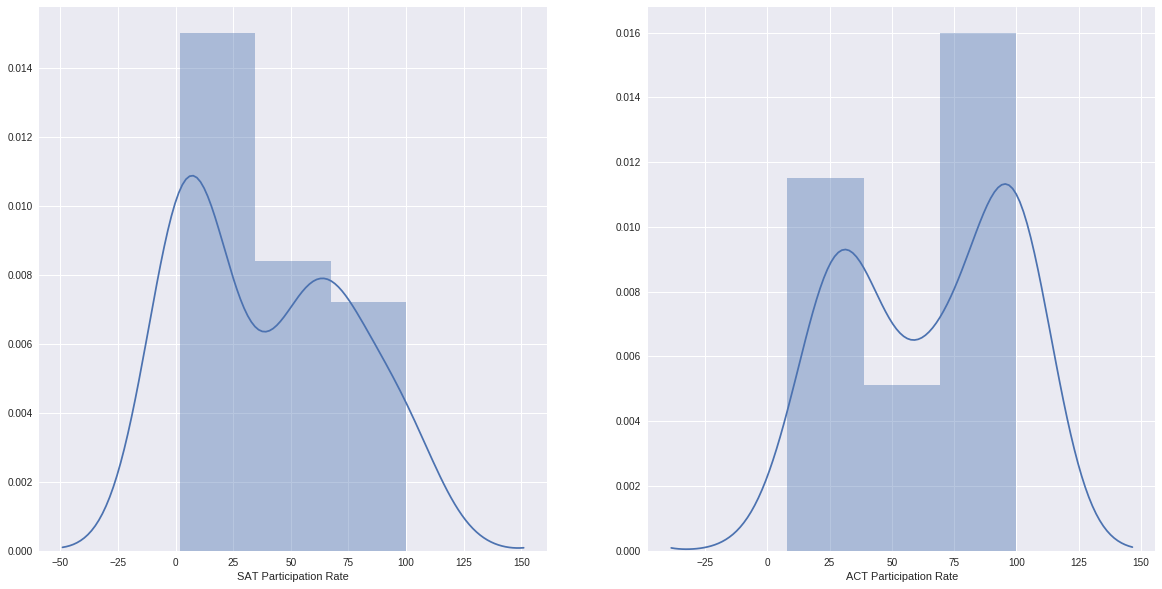

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,10) )
sns.distplot(sat_act['SAT_Rate'], axlabel='SAT Participation Rate', ax=ax1)
sns.distplot(sat_act['ACT_Rate'], axlabel='ACT Participation Rate', ax=ax2);

- The SAT participation rate seems to be right skewed, with a mean of about 39.8, with a range between 0 and 100. Conversely, the ACT Participation rate is right skewed, with a mean of about 65.3 and a range of 0 to 100. What we can infer from this is that among the high school graduates who take these exams, the ACT experiences a higher participation rate on average than the SAT. With participation rate being the main metric by which the College board is measuring sucess, we can say that the ACT performs stronger in this regard. 

**Comparing Math Scores**

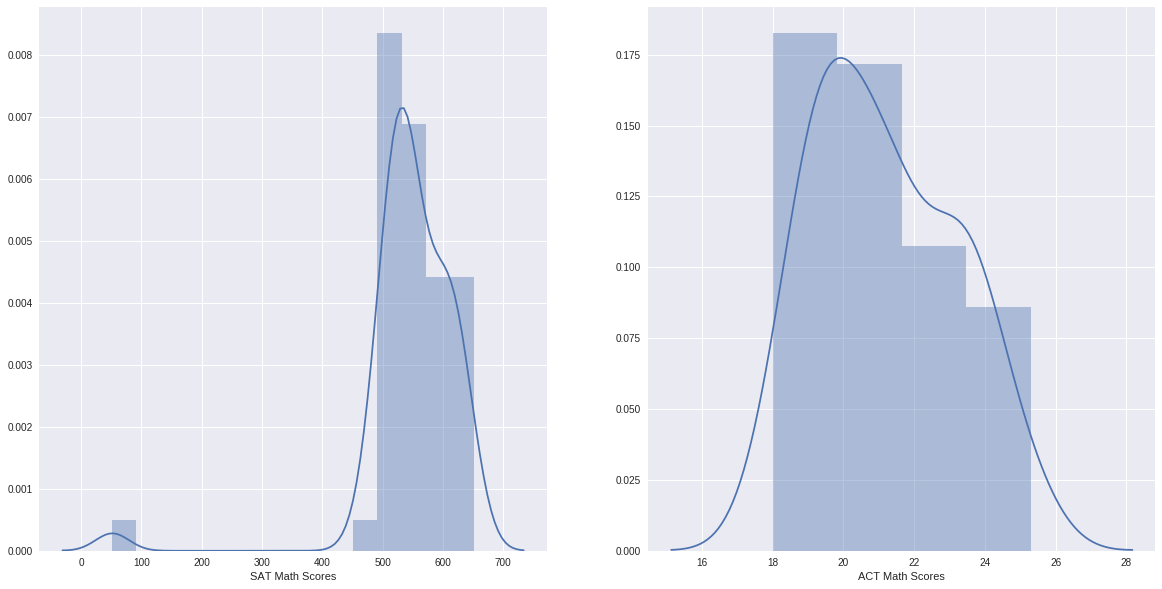

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,10) )
sns.distplot(sat_act['SAT_Math'], axlabel='SAT Math Scores', ax=ax1)
sns.distplot(sat_act['ACT_Math'], axlabel='ACT Math Scores', ax=ax2);

- The SAT Math scores have a very strong right skew, with a mean of 547.6, a range of 599 and a standard deviation of 84. Maryland seems to be an outlier where the average math score for that state was 52, even with an over-all participation rate of 68%. Looking at the numbers, we can impune that neither the skew nor mean of the SAT Math scores is significantly affected (median = 548) . 
- As for the ACT Math scores, the distribution is skewed right with a mean of 21, a range of 7.3 and a standard deviation of 1.98. What we can infer is that of the high school gratuate who take these exams, performance on the math portion of each exam is similarly distributed. 

**Comparing Verbal Scores**

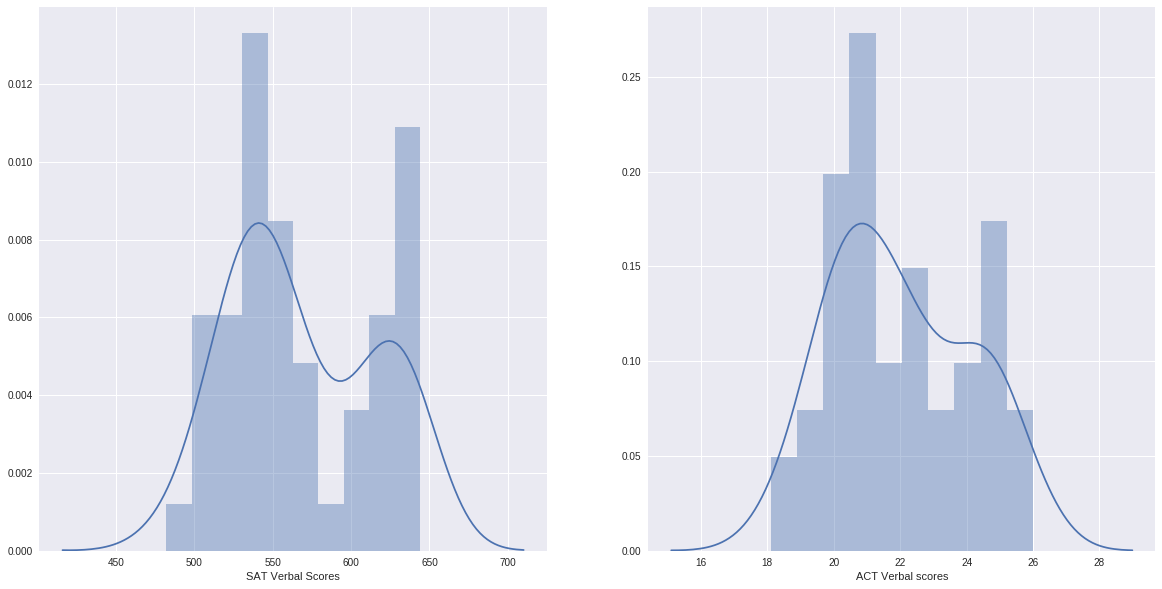

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,10) )
sns.distplot(sat_act['SAT_ELA'], bins=10, axlabel='SAT Verbal Scores', ax=ax1)
sns.distplot(sat_act['ACT_Reading'], bins=10, axlabel='ACT Verbal scores', ax=ax2); 

- The SAT Verbal distribution has a right skew, with a mean of 569, range of 162, and a standard deviation of 45.
- The ACT Verbal distribution is approoximately normally distributed, with a mean of 22, a range of 8, and a standard deviation of 2. 
- Looking at these two distributions, we can begin to see how the level of detail in our data is lacking. Since all of these scores are averaged out, we loose the ability to see, and further inspect scores on either end of the spectrum. For example, SAT section exam scores  can range from 200 to 800. However, in the distributuion of Verbal scores observed, we have a min of 482 and a max of 644. We have no data on events on the extremities of the spectrum, nor access to a state by state level distribution of scores per subject.   

#### Scatterplots 

Now, let's generate some scatterplots in order to examine the relationship between variables. I am particularly interested in the relationships between test scores and participation.

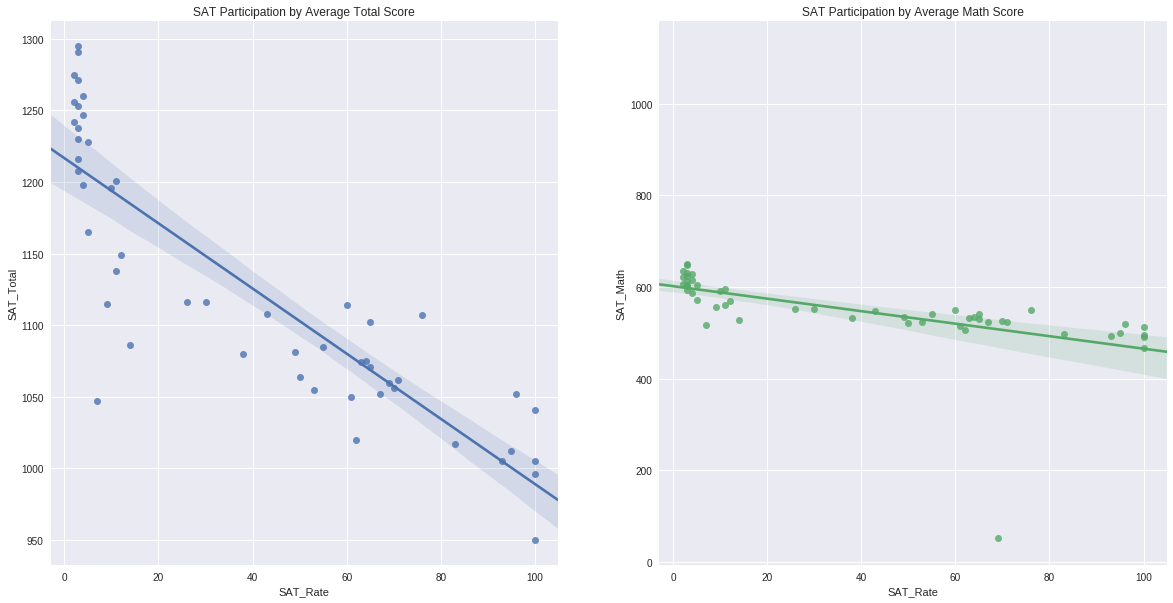

In [22]:
# Scatterplots of SAT Participation Rate by SAT Total & SAT Math
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,10) )
sns.regplot(sat_act['SAT_Rate'],sat_act['SAT_Total'], ax=ax1)
sns.regplot(sat_act['SAT_Rate'], sat_act['SAT_Math'], ax=ax2)
ax1.set_title("SAT Participation by Average Total Score")
ax2.set_title("SAT Participation by Average Math Score");

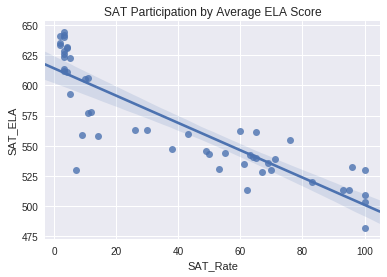

In [23]:
# Scatterplot of SAT Participation rate  by Average ELA Score
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.regplot(sat_act['SAT_Rate'],sat_act['SAT_ELA'])
ax.set_title("SAT Participation by Average ELA Score");

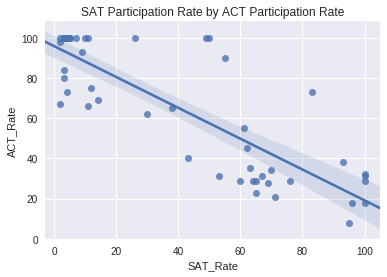

In [24]:
# Scatterplot of SAT Participation Rate by ACT Rate
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.regplot(sat_act['SAT_Rate'],sat_act['ACT_Rate'])
ax.set_title("SAT Participation Rate by ACT Participation Rate");

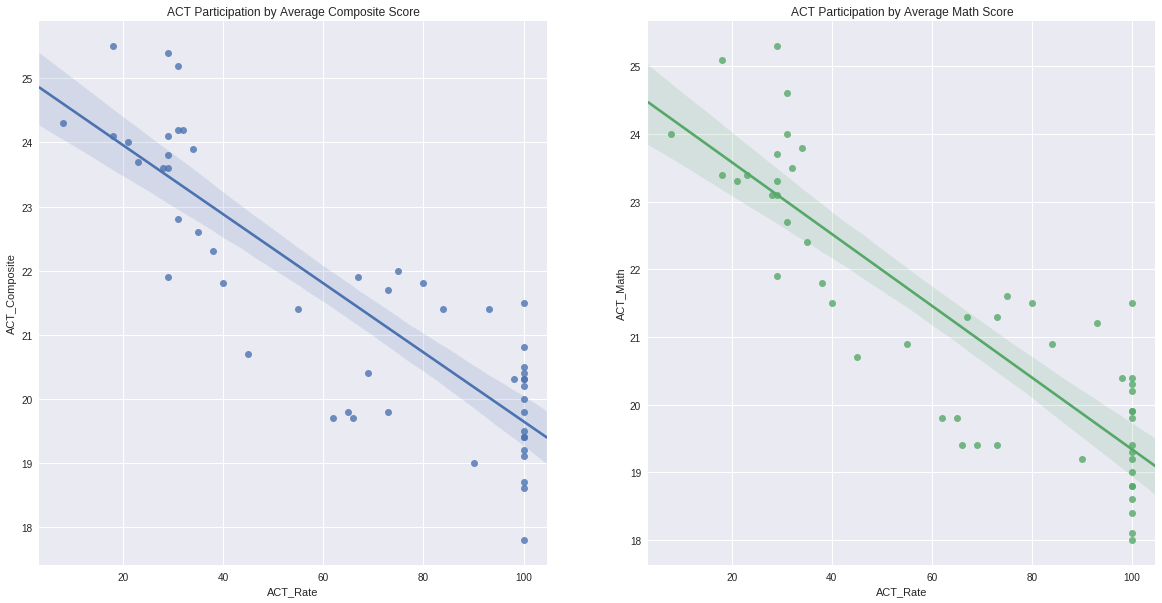

In [25]:
# Scatterplots of ACT Participation Rate by ACT Composite & ACT Math
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,10) )
sns.regplot(sat_act['ACT_Rate'], sat_act['ACT_Composite'], ax=ax1)
sns.regplot(sat_act['ACT_Rate'], sat_act['ACT_Math'], ax=ax2)
ax1.set_title("ACT Participation by Average Composite Score")
ax2.set_title("ACT Participation by Average Math Score");

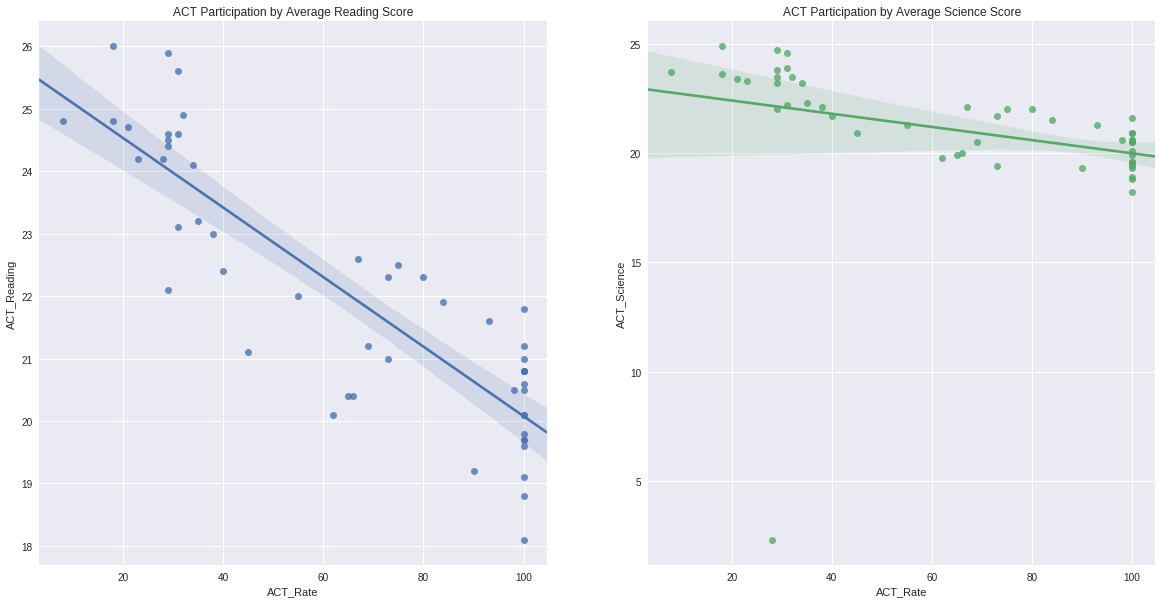

In [26]:
# Scatterplots of ACT Participation Rate by ACT Science & ACT Math
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,10) )
sns.regplot(sat_act['ACT_Rate'], sat_act['ACT_Reading'], ax=ax1)
sns.regplot(sat_act['ACT_Rate'], sat_act['ACT_Science'], ax=ax2)
ax1.set_title("ACT Participation by Average Reading Score")
ax2.set_title("ACT Participation by Average Science Score");

*Scatterplot Observations* 

- Out of all the scatterplots we have plotted with regards to participation rate, none of them exhibit a positive linear relationship. In other words, it can be widely observed that as participation moves closer to 100%, average scores in general go down. 

- Generally speaking, we can thus observe that most of thes scatterplots show a strong, negative, linear association between the participation rate and the average scores. The only instances where this negative linear association is not as strong are with the ACT Rate with respec to ACT Science, and the SAT Rate with respect to SAT Math. 

- Individual test scores seem to be higher in states where the participation rate for a given exam is lower. 

- States where we observe higher participation rate in one exam, tend to have a lower participation rate in the other.

#### Boxplots

Now, let's plot som boxplots for each varriable.

/home/schubert/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


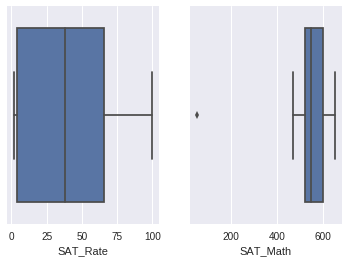

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(sat_act['SAT_Rate'], ax=ax1)
sns.boxplot(sat_act['SAT_Math'], ax=ax2);

/home/schubert/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


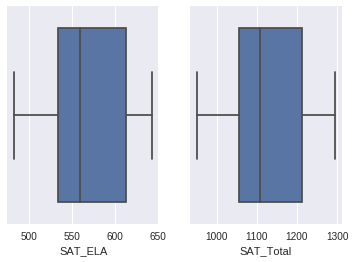

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(sat_act['SAT_ELA'], ax=ax1)
sns.boxplot(sat_act['SAT_Total'], ax=ax2);

/home/schubert/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


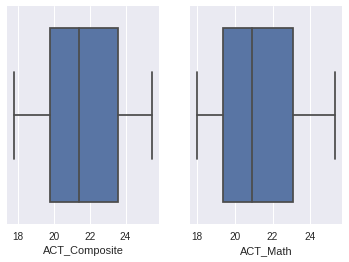

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(sat_act['ACT_Composite'], ax=ax1)
sns.boxplot(sat_act['ACT_Math'],ax=ax2);

/home/schubert/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


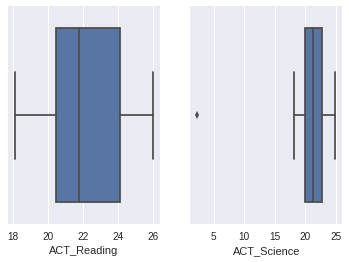

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(sat_act['ACT_Reading'], ax=ax1)
sns.boxplot(sat_act['ACT_Science'], ax=ax2);

/home/schubert/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


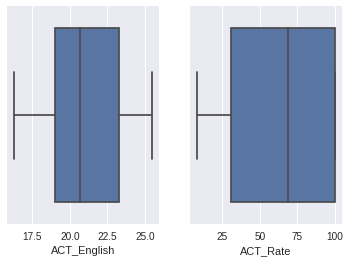

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(sat_act['ACT_English'], ax=ax1)
sns.boxplot(sat_act['ACT_Rate'], ax=ax2);

**Tableau Heatmap & Presentation**: 

In [32]:
%%HTML
<div class='tableauPlaceholder' id='viz1525681803954' style='position: relative'><noscript><a href='#'><img alt='How to Increase SAT  Participation ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;KX&#47;KXJZ4T733&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;KXJZ4T733' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;KX&#47;KXJZ4T733&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1525681803954');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<a id='stats'></a>
### Inferential Statistics & Conclusion

*Executing a Hypothesis test*

The following hypothesis test will compare the ACT and SAT participation rates. Alpha will be equal to 0.05.

In [33]:
# Hypothesis test
result = stats.ttest_ind(sat_act['SAT_Rate'],sat_act['ACT_Rate'])
result.statistic, result.pvalue
a = .05

if result.pvalue < a:
    print('We can confidently reject the null hypothesis!')

We can confidently reject the null hypothesis!


Since our resulting p-value is below 0.05, this means that we can reject the null hypothesis, and infer that there is a meaningful statistical difference between ACT and SAT participation rates. 

This is interesting! But we must look into this futher. Let's do that by looking at the 95% confidence interval for participation rates between the SAT and ACT

In [34]:
# Confidence Interval SAT Rate
z = 1.96 # z score for a CI of 95% 
sample_mean = np.mean(sat_act['SAT_Rate'])
sample_sem = np.std(sat_act['SAT_Rate'])/np.sqrt(len(sat_act['SAT_Rate']))

lower_end = sample_mean - z * sample_sem
high_end = sample_mean + z*sample_sem
(lower_end,high_end)

(30.21746706759239, 49.39037606966251)

In [35]:
# Confidence Interval for ACT Rate
z = 1.96 # z score for a CI of 95% 
sample_mean = np.mean(sat_act['ACT_Rate'])
sample_sem = np.std(sat_act['ACT_Rate'])/np.sqrt(len(sat_act['ACT_Rate']))

low_end = sample_mean - z* sample_sem
high_end = sample_mean + z * sample_sem
(low_end,high_end)

(56.52060109975314, 73.98920282181548)

Based on the above results, we can be confident of the following:
- 95% of the time, a given state's **SAT** participation rate will fall between **30%** and **49.3%**.
- 95% of the time, a given state's **ACT** participation rate will fall between **56.5%** and **73.9%**

This disparity in confidence intervals is not a surprising finding, given the fact that in executing the hypothesis test, we were able to reject the null hupothesis and infer that the difference between SAT and ACT participation rates would be statistically different.

With regards to ACT and SAT Math scores, given the data we have now, it would not be appropriate to generate a correlation between the two. They are two different exams, and performance on one doesn't have an correlative effect of performance on the other. The only scenario where we might want to investigate whether there is a correlation between the two is if we were able to subselect the group of students who took both exams one after the other. But trying to do so based of state averages is tantamount to scientific malpractice. 

Finally, supposing we only seek to understand the relationship between SAT and ACT data in 2017, it does make sense to conduct *limited* statistical inference given the data we have. I stress *limited* is because, even though we techniocally have a good enough sample size to conduct inferences and perform statistically representatitve analyses, the level of detail of this data set leaves a lot to be desired, as outlined in the [Data Integrity Check](#inte) section.

More data, better data, better insights. 